<a href="https://colab.research.google.com/github/jh6695/study/blob/main/%EC%9E%90%EC%97%B0%EC%96%B4_3_%EC%B9%B4%EC%9A%B4%ED%8A%B8_%EA%B8%B0%EB%B0%98%EC%9D%98_%EB%8B%A8%EC%96%B4_%ED%91%9C%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Bag of words

단어의 순서는 고려하지 않고 출연 빈도만 고려한 텍스트 데이터의 수치화 표현 방법

1. 각 단어에 고유한 정수 인덱스 부여 #단어 집합 생성
2. 각 인덱스 위치에 단어 토큰의 등장 횟수를 기록한 벡터 생성

In [15]:
from konlpy.tag import Okt
okt = Okt()

def build_bag_of_word(document):
  #온점 제거 및 형태소 분석
  document = document.replace(".", "")
  tokenized_document = okt.morphs(document)

  word_to_index = {}
  bow = []

  for word in tokenized_document:
    if word not in word_to_index.keys():
      word_to_index[word] = len(word_to_index) #해당 단어가 존재하지 않을 경우 인덱스와 키 추가
      bow.insert(len(word_to_index) - 1, 1) #bow에 기본값 1 추가. insert(인덱스, 추가값)
    else:
      index = word_to_index.get(word) #재등장하는 단어의 인덱스값
      bow[index] = bow[index] + 1 #인덱스에 1 추가

  return word_to_index, bow


In [16]:
doc1 = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."

vocab, bow = build_bag_of_word(doc1)
print("vocab:", vocab)
print("bow:", bow) #인덱스는 0부터 시작됨에 주의

vocab: {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}
bow: [1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


In [17]:
doc2 = '소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.'

vocab, bow = build_bag_of_word(doc2)
print("vocab:", vocab)
print("bow:", bow)

vocab: {'소비자': 0, '는': 1, '주로': 2, '소비': 3, '하는': 4, '상품': 5, '을': 6, '기준': 7, '으로': 8, '물가상승률': 9, '느낀다': 10}
bow: [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]


In [18]:
doc3 = doc1 + ' ' + doc2

vocab, bow = build_bag_of_word(doc3)
print("vocab:", vocab)
print("bow:", bow) #동일 단어 합쳐짐

vocab: {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9, '는': 10, '주로': 11, '소비': 12, '상품': 13, '을': 14, '기준': 15, '으로': 16, '느낀다': 17}
bow: [1, 2, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]


bow는 단어의 등장 횟수를 수치화하는 텍스트 표현 방법이기 때문에 자주 등장하는 단어 확인 가능.

이를 이용해 문서가 어떤 성격인지 파악 가능. 분류, 여러 문서 간 유사도 파악 등.

'달리기', '체력', '근력' -> 체육 관련 문서

'미분', '방정식' -> 수학 관련 문서

# 2. CountVectorizer로 bow 만들기

사이킷런의 단어 빈도로 벡터를 만드는 CountVectorizer 클래스로 영어에 대해 손쉽게 bow 만들기 가능.

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()

#코퍼스의 각 단어 빈도수 출략
print("bow vector: ", vector.fit_transform(corpus).toarray())
#각 단어의 인덱스가 어떻게 부여됐는지 출력
print("vocab:", vector.vocabulary_)

bow vector:  [[1 1 2 1 2 1]]
vocab: {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


이 과정에서 I는 제거됨. 짧은 단어 제거하려는 정제 특성.

CountVectorize는 띄어쓰기 기준 벡터 생성. 한국어는 적용할 수 없다.

#3. 불용어를 제거한 bow 만들기

단어의 수를 카운트하는 형식이기 때문에 불용어를 제거하는 것은 더욱 정확한 결과를 위한 전처리가 될 수 있음.

In [20]:
from nltk.corpus import stopwords

In [22]:
#사용자가 직접 정의한 불용어 사용
text = ["Family is not an important thing. It's everything."]

vector = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])
print("vector:", vector.fit_transform(text).toarray())
print("vocab:", vector.vocabulary_)

vector: [[1 1 1 1 1]]
vocab: {'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


In [24]:
#countvectroize에서 제공하는 자체 불용어 사용
text = ["Family is not an important thing. It's everything."]

vector = CountVectorizer(stop_words ="english")
print("vector:", vector.fit_transform(text).toarray())
print("vocab:", vector.vocabulary_)

vector: [[1 1 1]]
vocab: {'family': 0, 'important': 1, 'thing': 2}


In [33]:
#nltk에서 지원하는 불용어 사용
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
text = ["Family is not an important thing. It's everything."]

stopwords = stopwords.words("english")
vector = CountVectorizer(stop_words = stopwords)
print("vector:", vector.fit_transform(text).toarray())
print("vocab:", vector.vocabulary_)

vector: [[1 1 1 1]]
vocab: {'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!




---


# 문서 단어 행렬

서로 다른 문서들의 bow를 결합한 방식. 각 단어의 빈도를 행렬값으로 나타냄.

문서1 : 먹고 싶은 사과

문서2 : 먹고 싶은 바나나

문서3 : 길고 노란 바나나 바나나

문서4 : 저는 과일이 좋아요

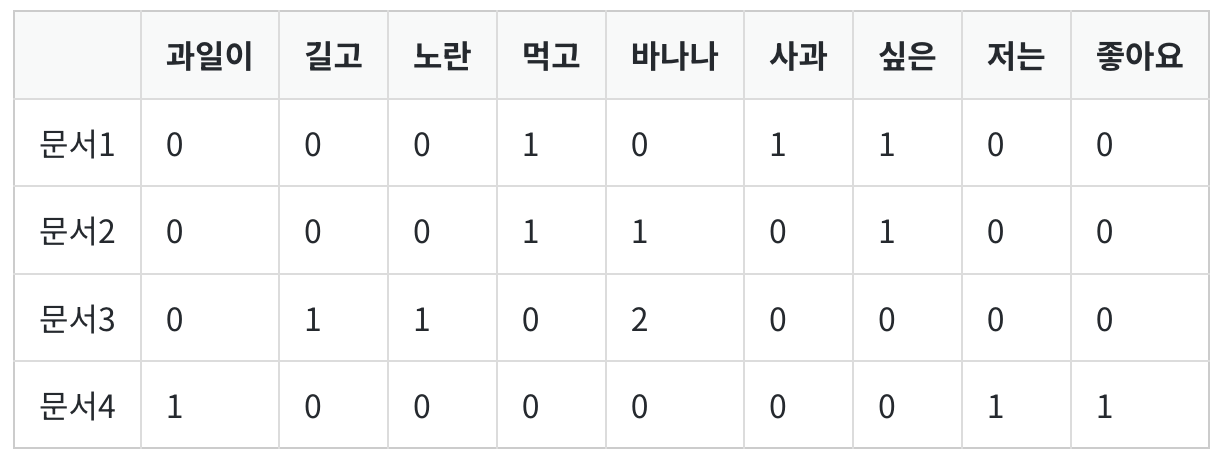

#문서 단어 행렬의 한계

- 희소 벡터, 희소 행렬(값이 0인 벡터)=
- 공간 낭비와 계산 리소스 증가

-> 전처리를 통해 단어의 집합을 줄이는 것이 중요

- 단순 빈도수 접근(the, a 같은 불용어 문제 존재)



---

#TF-IDF

(단어 빈도-역문서 빈도)

DTM 내의 각 단어의 중요도를 계산할 수 있는 TF-IDF 가중치

TF-IDF는 TF와 IDF를 곱한 값

d: 문서, t: 단어, n: 총 개수

- tf(d, t): 특정 문서 d에서 특정 단어 t의 개수
- df(t): 특정 단어 t가 등장하는 문서의 개수
- idf(t): t에 반비례하는 수

idf(t) = log(\frac{n}{1+df(t)})

로그를 취하는 이유: 취하지 않으면 문서 n이 늘어날수록 idf가 기하급수적으로 증가해서

문모에 +1을 하는 이유: 특정 단어가 전체 문서에 등장하지 않아 분모가 0이 되는 것을 방지하기 위해서

TF-IDF는 모든 문서에 자주 등장하는 단어도는 중요도가 낮다고 판단하고, 특정 문서에 자주 등장하는 단어는 중요도가 높다고 판단함.

값이 클수록 중요도 높음.

# 파이썬으로 직접 TF-IDF 구현하기

In [35]:
import pandas as pd
from math import log

docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
]

vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [75]:
#총 문서의 수
N = len(docs)

def tf(t, d):
  return d.count(t)

def idf(t):
  df = 0
  for doc in docs:
    df += t in doc
  return log(N/(1+df))

def tfidf(t, d):
  return tf(t, d)*idf(t)

In [76]:
docs

['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

In [77]:
#tf
result = []

#각 문서에 대해 아래 연산 반복
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tf(t,d))

tf_ = pd.DataFrame(result, columns=vocab)

In [78]:
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [81]:
#idf
result = []
for j in range(len(vocab)):
  t = vocab[j]
  result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns=['IDF'])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [84]:
#tfidf
result = []
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tfidf(t, d))
tfidf_ = pd.DataFrame(result, columns=vocab)

In [85]:
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


#사이킷런을 이용힌 DTM과 TF-IDF 실습

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',
]

vector = CountVectorizer()

print(vector.fit_transform(corpus).toarray())
print(vector.vocabulary_)

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',
]

Tfidf = TfidfVectorizer().fit(corpus)
print(Tfidf.transform(corpus).toarray())
print(Tfidf.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}
